In [11]:
import pandas as pd
import seaborn as sns

In [12]:
data=pd.read_csv("/home/project08/Desktop/TI28/Admission_Predict_Ver1.1.csv")

In [13]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [14]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [15]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [16]:
data.shape

(500, 9)

In [17]:
data=data.drop("Serial No.",axis=1)

In [18]:
data.shape

(500, 8)

In [19]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [21]:
data['Chance of Admit '] = [1 if each > 0.75 else 0 for each in data['Chance of Admit ']]

In [22]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [23]:
x = data[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research']]

y = data['Chance of Admit ']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [26]:
print(f"Size of splitted data")
print(f"x_train {x_train.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {x_test.shape}")
print(f"y_test {y_test.shape}")

Size of splitted data
x_train (375, 7)
y_train (375,)
y_test (125, 7)
y_test (125,)


In [27]:
from sklearn.tree import DecisionTreeRegressor

In [28]:
model_dt = DecisionTreeRegressor(random_state=1)

In [29]:
model_dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=1)

In [30]:
y_pred_dt = model_dt.predict(x_test)

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

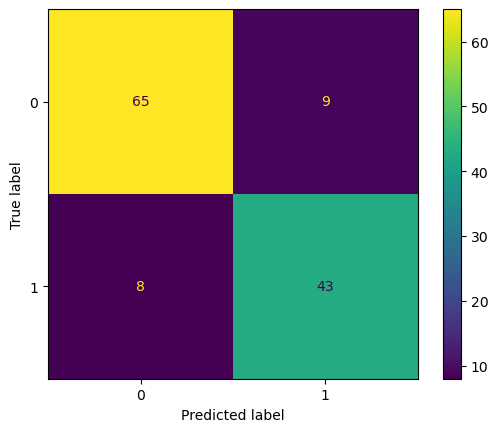

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt)

In [38]:
print(f" Accuracy is {accuracy_score(y_test,y_pred_dt)}")

 Accuracy is 0.864


In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.83      0.84      0.83        51

    accuracy                           0.86       125
   macro avg       0.86      0.86      0.86       125
weighted avg       0.86      0.86      0.86       125



In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
model_rf = RandomForestRegressor(random_state=1)

In [42]:
model_rf.fit(x_train,y_train)

RandomForestRegressor(random_state=1)

In [43]:
y_pred_rf = model_rf.predict(x_test) #float

In [44]:
y_pred_rf = [1 if each > 0.75 else 0 for each in y_pred_rf]

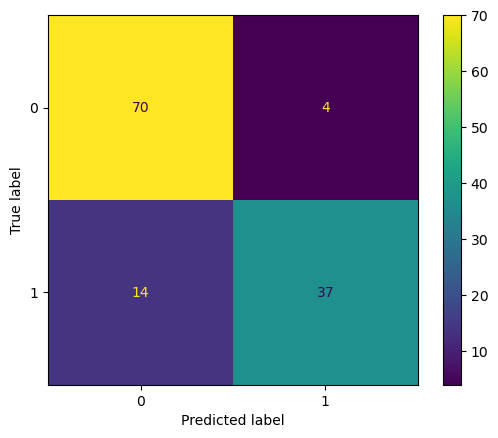

In [48]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf)

In [47]:
print(f" Accuracy is {accuracy_score(y_test,y_pred_rf)}")

 Accuracy is 0.856


In [49]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89        74
           1       0.90      0.73      0.80        51

    accuracy                           0.86       125
   macro avg       0.87      0.84      0.85       125
weighted avg       0.86      0.86      0.85       125



In [50]:
from sklearn.linear_model import LogisticRegression

In [77]:
model_lr = LogisticRegression(random_state=1,solver='lbfgs',max_iter=1000)

In [78]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [79]:
y_pred_lr = model_lr.predict(x_test)

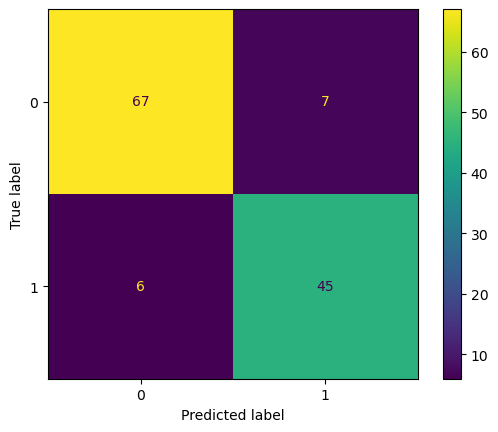

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_lr)

In [81]:
print(f" Accuracy is {accuracy_score(y_test,y_pred_lr)}")

 Accuracy is 0.896


In [82]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91        74
           1       0.87      0.88      0.87        51

    accuracy                           0.90       125
   macro avg       0.89      0.89      0.89       125
weighted avg       0.90      0.90      0.90       125

